In [1]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

from matplotlib import pyplot as plt

1.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data() # Loading cifar10 dataset 
# changing the shape for X_train, X_test, y_train, y_test
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# converting class vector to binary class matrix.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# normalizing the data
X_train = X_train / 255
X_test = X_test / 255

In [4]:
# creating sequential model
model = Sequential()
# adding convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', activation = 'relu', input_shape=X_train.shape[1:]))
# adding 20% drop out
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation = 'relu'))
# adding max pool layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# adding the flatten layer to flatten the data
model.add(Flatten())
model.add(Dropout(0.2))

# adding fully connected layers
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

# adding final fully connected layer with softmax 
model.add(Dense(10, Activation('softmax')))

In [5]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [6]:
# fitting the model
model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
4000/4000 [==============================] - 53s 11ms/step - loss: 1.9979 - accuracy: 0.2652 - val_loss: 1.7749 - val_accuracy: 0.3815
Epoch 2/10
4000/4000 [==============================] - 43s 11ms/step - loss: 1.6196 - accuracy: 0.4141 - val_loss: 1.5036 - val_accuracy: 0.4632
Epoch 3/10
4000/4000 [==============================] - 41s 10ms/step - loss: 1.4523 - accuracy: 0.4739 - val_loss: 1.3737 - val_accuracy: 0.5164
Epoch 4/10
4000/4000 [==============================] - 42s 11ms/step - loss: 1.3351 - accuracy: 0.5165 - val_loss: 1.3329 - val_accuracy: 0.5186
Epoch 5/10
4000/4000 [==============================] - 42s 11ms/step - loss: 1.2328 - accuracy: 0.5543 - val_loss: 1.1534 - val_accuracy: 0.5960
Epoch 6/10
4000/4000 [==============================] - 41s 10ms/step - loss: 1.1446 - accuracy: 0.5911 - val_loss: 1.0901 - val_accuracy: 0.6245
Epoch 7/10
4000/4000 [==============================] - 42s 10ms/step - loss: 1.0563 - accuracy: 0.6227 - val_loss: 1.0062 -

In [7]:
# printing the loss and accuracy
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
model.save('model.h5')

313/313 [==============================] - 3s 9ms/step - loss: 0.8704 - accuracy: 0.6963
Test loss: 0.8704068064689636
Test accuracy: 0.6963000297546387


2.1 Apply the following callbacks to the model:


In [8]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data() # Loading cifar10 dataset
# changing the shape for X_train, X_test, y_train, y_test
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [9]:
# converting class vector to binary class matrix.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# normalizing the data
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# creating functional model
input_layer= Input(shape=X_train.shape[1:]) # input layer

# adding convolutional layer and passing it the input layer
conv1 = Conv2D(32, (3, 3), padding='same', activation='relu')(input_layer)
# adding the 20% dropout layer passing it the layer before
drop1 = Dropout(0.2)(conv1)

conv2 = Conv2D(32, (3, 3), padding='same', activation='relu')(drop1)
# adding max pool layer
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(64, (3, 3), padding='same', activation='relu')(pool1)
drop2 = Dropout(0.2)(conv3)

conv4 = Conv2D(64, (3, 3), padding='same', activation='relu')(drop2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(128, (3, 3), padding='same', activation='relu')(pool2)
drop3 = Dropout(0.2)(conv5)

conv6 = Conv2D(128, (3, 3), padding='same', activation='relu')(drop3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv6)

# adding the flatten layer to flatten the data
flat = Flatten()(pool3)
drop4 = Dropout(0.2)(flat)

# adding fully connected layers
hidden_layer=Dense(1024, activation='relu')(drop4) # 1st hidden layer
drop5 = Dropout(0.2)(hidden_layer)
hidden_layer2=Dense(512, activation='relu')(drop5) # 2nd hidden layer
drop6 = Dropout(0.2)(hidden_layer2)

# adding final fully connected layer with softmax 
output_layer=Dense(10, activation='softmax')(drop6) # output layer

model = Model(inputs= input_layer, outputs=output_layer) # Initializing and creating the functional api model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model

# creating ReduceLROnPlateau callback
LRR = ReduceLROnPlateau(monitor='val_acc', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
# creating EarlyStopping callback
ES = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
# creating ModelCheckpoint callback
MC = ModelCheckpoint(filepath='modelMC.h5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto')

In [11]:
# fitting the model
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2, shuffle=True, callbacks=[LRR, ES, MC])

Epoch 1/10
4000/4000 [==============================] - 56s 14ms/step - loss: 1.7308 - accuracy: 0.3741 - val_loss: 1.5393 - val_accuracy: 0.4374 - lr: 0.0010
Epoch 2/10
4000/4000 [==============================] - 53s 13ms/step - loss: 1.5535 - accuracy: 0.4575 - val_loss: 1.3265 - val_accuracy: 0.5206 - lr: 0.0010


3. Save the model. (Store this model will be required for future ICP).

In [12]:
# saving the model
model.save('modelFunctionalAPI.h5')

In [13]:
# printing the scores
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 9ms/step - loss: 1.3423 - accuracy: 0.5202
Test loss: 1.3423163890838623
Test accuracy: 0.5202000141143799


4. Predict the first 4 images of the test data. Then, print the actual label for those 4 images (label means the probability associated with them) to check if the model predicted correctly or not.

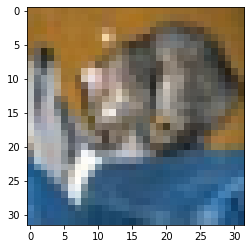

Actual:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted:  [0.01315546 0.01377462 0.06375027 0.35381797 0.04371556 0.20029968
 0.2075395  0.04206346 0.02171545 0.040168  ]


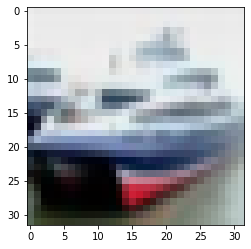

Actual:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Predicted:  [1.2950243e-01 2.2125790e-01 7.0379459e-04 2.9879736e-04 3.3387370e-04
 1.5959149e-05 3.7020684e-04 7.8791527e-05 5.4510039e-01 1.0233783e-01]


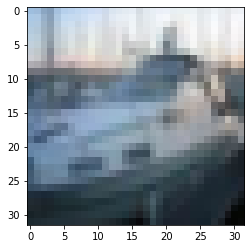

Actual:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Predicted:  [0.36111495 0.05360067 0.04187609 0.02423074 0.04167052 0.0076034
 0.01162632 0.02272448 0.35546595 0.0800868 ]


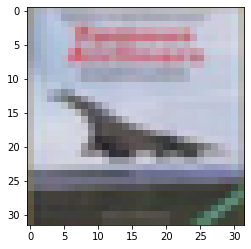

Actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted:  [4.1672024e-01 3.7608605e-02 3.4972406e-03 4.3300114e-04 2.3625384e-03
 3.5627094e-05 3.0071271e-04 3.4382645e-04 5.0575650e-01 3.2941684e-02]


In [14]:
for i in range(4):
  plt.imshow(X_test[i,:,:])
  plt.show()
  y = model.predict(X_test[[i],:])
  print("Actual: ", y_test[i], "Predicted: ", y[0])

In [15]:
import os
path1 = os.getcwd() + '/train_data'
path2 = os.getcwd() + '/test_data'

In [19]:
os.listdir(path1)

['.ipynb_checkpoints', 'airplane', 'church']

In [20]:
os.listdir(path2)

['.ipynb_checkpoints', 'airplane', 'church']

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
# Image generator for training (includes data augmentation)
imgTrainGen = ImageDataGenerator(
    samplewise_center=True,  # Set each sample mean to 0.
    # Divide each input by its standard deviation]
    samplewise_std_normalization=True,
    rescale=1./255,
    zoom_range=0.2,
)

# Image generator for Validation (didn't include augmentation)
imgValidGen =ImageDataGenerator(
    samplewise_center=True,  # Set each sample mean to 0.
    samplewise_std_normalization=True,
    rescale=1./255,
)
# Build for training
trainGeneratorBuild = imgTrainGen.flow_from_directory(
    path1,
    target_size=(32, 32),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)
# Build for validation
validGeneratorBuild = imgValidGen.flow_from_directory(
    path2,
    target_size=(32, 32),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)


Found 80 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [21]:
class_names = trainGeneratorBuild .class_indices #visualizing the classes in the dataset.
print(class_names)


{'.ipynb_checkpoints': 0, 'airplane': 1, 'church': 2}


In [33]:
from keras.models import load_model

model = load_model('modelMC.h5')


In [34]:
x = model.layers[-2].output #eliminating the last layer of our saved model as it is a fully connected layer and not required for new classification
# Flatten the output layer to 1 dimension
x = Flatten()(x)
# Create a new dense layer for predictions
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions =Dense(1, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.
model_new= Model(inputs=model.input, outputs=predictions)


In [35]:
for layer in model_new.layers[:-7]:  # not going to train the previous layers of the model.
  layer.trainable = False


In [36]:
model_new.summary()#summary of the model

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                           

In [45]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics='accuracy')#compiling the model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [86]:
mCheck = ModelCheckpoint('modelMC.h5', monitor='val_loss',
                     mode='min', verbose=1, save_best_only=True)


In [87]:
history=model.fit(trainGeneratorBuild,epochs=10,validation_data=validGeneratorBuild,batch_size=32,callbacks=mCheck)#fitting the model

Epoch 1/10


ValueError: ignored

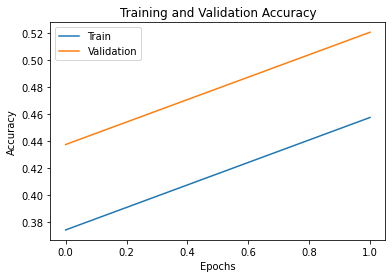

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

In [50]:
n_model = load_model(os.getcwd()+'/modelMC.h5') #loading the model

In [51]:
n_model.make_predict_function() #activating the prediction

In [73]:
d = {0:'airplane',1:'church'}

In [77]:
def predict_label(path):
	i = image.load_img(path, target_size=(32, 32))
	i = image.img_to_array(i)/255.0
	i = i.reshape(1, 32, 32, 3)
	p = np.argmax(n_model.predict(i))
	return d[p]

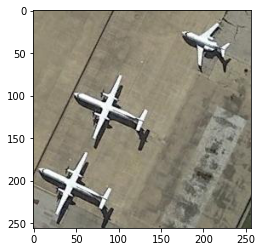

In [78]:
from tensorflow.keras.preprocessing import image
path = 'airplane_001.jpg'
img=image.load_img(path)
plt.imshow(img)

In [79]:
pred = predict_label(path)
print(pred)

KeyError: ignored